In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
plt.rcParams['figure.figsize'] = (16, 4)

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import pmdarima as pm

from pmdarima.pipeline import Pipeline
from pmdarima.preprocessing import BoxCoxEndogTransformer

from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)   
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [7]:
#read files from previous jupyter

df_area_1 = pd.read_pickle('data/clean/df_area_1.pickle') #(12192, 1)
df_area_2 = pd.read_pickle('data/clean/df_area_2.pickle') #(15480, 1)
df_area_3 = pd.read_pickle('data/clean/df_area_3.pickle') #(17160, 1)

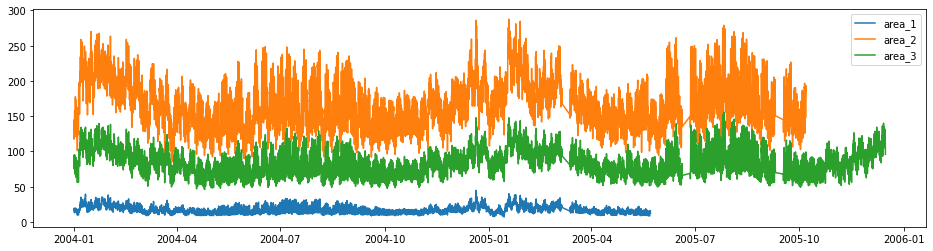

In [3]:
#plot
plt.plot(df_area_1, label='area_1')
plt.plot(df_area_2, label='area_2')
plt.plot(df_area_3, label='area_3')
plt.legend();

In [18]:
#area_2

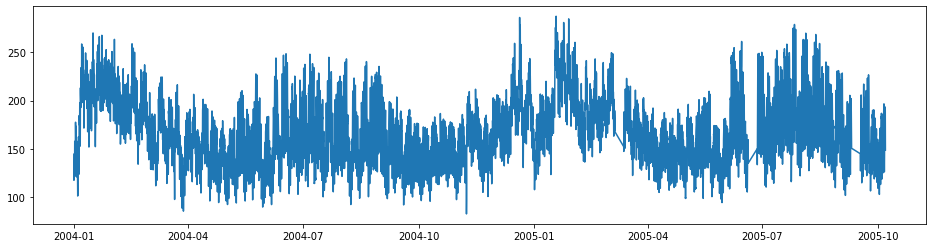

In [3]:
plt.plot(df_area_2, label='area_2')

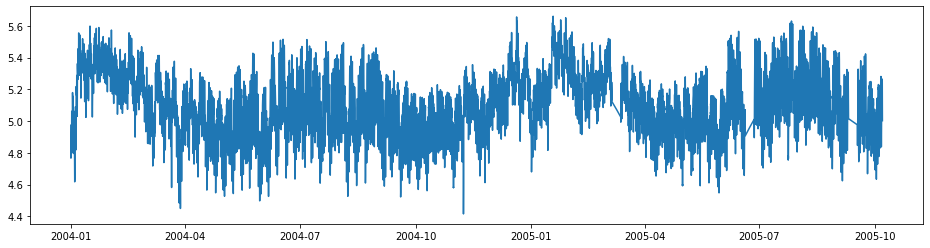

In [9]:
df_area_2_log = np.log(df_area_2)
plt.plot(df_area_2_log, label='area_2')

In [10]:
df_area_2_log_train = df_area_2_log[:-24*7]
df_area_2_log_test = df_area_2_log[-24*7:]

df_area_2_train = df_area_2[:-24*7]
df_area_2_test = df_area_2[-24*7:]

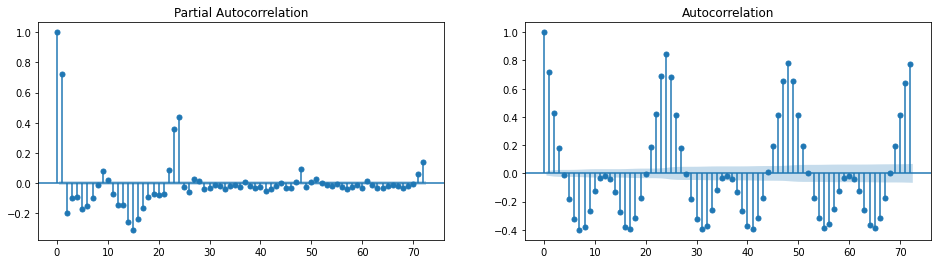

In [11]:
fig, ax = plt.subplots(1,2)
plot_pacf(df_area_2_log_train.diff().dropna(), alpha=.05, lags=72, ax=ax[0], method='ols')  
plot_acf(df_area_2_log_train.diff().dropna(), alpha=.05, lags=72, ax=ax[1])  
plt.show()

In [18]:
#small train set to run faster
df_area_2_train_s = df_area_2[-24*45:-24*7]
df_area_2_test_s = df_area_2[-24*7:]

df_area_2_train_s.shape


(912, 1)

In [19]:
sarimax_a2 = pm.AutoARIMA(trace=True, supress_warnings=True, m=24)
sarimax_a2.fit(df_area_2_train_s)

#sarimax_a1_forecast = sarimax_a1.predict(24)
# mean_absolute_error(np.exp(sarimax_a1_forecast),np.exp(df_area_1_log_test))

Performing stepwise search to minimize aic


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=4458.017, Time=9.37 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=6233.082, Time=0.24 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=4503.675, Time=2.14 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=5090.233, Time=3.32 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=6231.091, Time=0.03 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=4827.518, Time=7.88 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=4508.272, Time=8.65 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(2,0,1)[24] intercept   : AIC=inf, Time=77.03 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,2)[24] intercept   : AIC=4436.075, Time=52.56 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(0,0,2)[24] intercept   : AIC=4688.261, Time=47.17 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(2,1,2)(2,0,2)[24] intercept   : AIC=inf, Time=74.70 sec
 ARIMA(1,1,2)(1,0,2)[24] intercept   : AIC=4434.340, Time=32.59 sec
 ARIMA(1,1,2)(0,0,2)[24] intercept   : AIC=4686.474, Time=15.48 sec
 ARIMA(1,1,2)(1,0,1)[24] intercept   : AIC=4456.201, Time=6.95 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,1,2)(2,0,2)[24] intercept   : AIC=inf, Time=78.02 sec
 ARIMA(1,1,2)(0,0,1)[24] intercept   : AIC=4825.992, Time=4.63 sec
 ARIMA(1,1,2)(2,0,1)[24] intercept   : AIC=inf, Time=59.16 sec
 ARIMA(0,1,2)(1,0,2)[24] intercept   : AIC=4473.858, Time=30.82 sec
 ARIMA(1,1,1)(1,0,2)[24] intercept   : AIC=4432.930, Time=28.31 sec
 ARIMA(1,1,1)(0,0,2)[24] intercept   : AIC=4684.642, Time=17.75 sec
 ARIMA(1,1,1)(1,0,1)[24] intercept   : AIC=4455.356, Time=5.14 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


 ARIMA(1,1,1)(2,0,2)[24] intercept   : AIC=inf, Time=64.62 sec
 ARIMA(1,1,1)(0,0,1)[24] intercept   : AIC=4824.080, Time=3.69 sec
 ARIMA(1,1,1)(2,0,1)[24] intercept   : AIC=inf, Time=53.20 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(0,1,1)(1,0,2)[24] intercept   : AIC=4547.690, Time=27.87 sec
 ARIMA(1,1,0)(1,0,2)[24] intercept   : AIC=4433.935, Time=24.87 sec
 ARIMA(2,1,1)(1,0,2)[24] intercept   : AIC=4434.115, Time=56.37 sec
 ARIMA(0,1,0)(1,0,2)[24] intercept   : AIC=4895.435, Time=20.68 sec
 ARIMA(2,1,0)(1,0,2)[24] intercept   : AIC=4433.208, Time=29.22 sec
 ARIMA(1,1,1)(1,0,2)[24]             : AIC=4430.933, Time=23.75 sec
 ARIMA(1,1,1)(0,0,2)[24]             : AIC=4682.656, Time=10.98 sec
 ARIMA(1,1,1)(1,0,1)[24]             : AIC=4453.362, Time=2.81 sec
 ARIMA(1,1,1)(2,0,2)[24]             : AIC=inf, Time=51.09 sec
 ARIMA(1,1,1)(0,0,1)[24]             : AIC=4822.099, Time=1.76 sec
 ARIMA(1,1,1)(2,0,1)[24]             : AIC=inf, Time=35.42 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(0,1,1)(1,0,2)[24]             : AIC=4545.697, Time=15.98 sec
 ARIMA(1,1,0)(1,0,2)[24]             : AIC=4431.938, Time=13.71 sec
 ARIMA(2,1,1)(1,0,2)[24]             : AIC=4432.118, Time=36.50 sec
 ARIMA(1,1,2)(1,0,2)[24]             : AIC=4432.343, Time=22.95 sec
 ARIMA(0,1,0)(1,0,2)[24]             : AIC=4893.443, Time=5.96 sec
 ARIMA(0,1,2)(1,0,2)[24]             : AIC=4471.863, Time=19.58 sec
 ARIMA(2,1,0)(1,0,2)[24]             : AIC=4431.211, Time=16.67 sec


/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,1,2)(1,0,2)[24]             : AIC=4434.078, Time=36.53 sec

Best model:  ARIMA(1,1,1)(1,0,2)[24]          
Total fit time: 1136.284 seconds


AutoARIMA(m=24, trace=True)

In [22]:
sarimax_pipeline_a2 = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=24
                          )
    )
])

sarimax_pipeline_a2.fit(df_area_2_train_s)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=inf, Time=22.26 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=-1488.592, Time=0.25 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=inf, Time=9.43 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-3223.818, Time=10.84 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=5107.084, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[24] intercept   : AIC=-2663.435, Time=0.97 sec
 ARIMA(0,0,1)(1,0,1)[24] intercept   : AIC=-3379.477, Time=16.22 sec
 ARIMA(0,0,1)(1,0,0)[24] intercept   : AIC=inf, Time=10.57 sec
 ARIMA(0,0,1)(2,0,1)[24] intercept   : AIC=inf, Time=55.40 sec
 ARIMA(0,0,1)(1,0,2)[24] intercept   : AIC=inf, Time=88.09 sec
 ARIMA(0,0,1)(0,0,2)[24] intercept   : AIC=-3412.594, Time=37.82 sec
 ARIMA(0,0,0)(0,0,2)[24] intercept   : AIC=-2268.704, Time=17.75 sec
 ARIMA(1,0,1)(0,0,2)[24] intercept   : AIC=-5316.547, Time=70.57 sec
 ARIMA(1,0,1)(0,0,1)[24] intercept   : AIC=-5104.489, Time=13.63 sec
 ARIMA(1,0,1)(1,0,2)[24] i

/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:437: ModelFitWarning: Error fitting  ARIMA(2,0,1)(1,0,2)[24] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py", line 421, in _fit_candidate_model
    fit.fit(x, exogenous=xreg, **fit_params)
  File "/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/pmdarima/arima/arima.py", line 472, in fit
    self._fit(y, exogenous, **fit_args)
  File "/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/pmdarima/arima/arima.py", line 395, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/home/fernandamcohen/.virtualenvs/hckt03_2019/lib/python3.6/site-packages/pmdarima/arima/arima.py", line 389, in _fit_wrapper
    **fit_args)
  File "/home/fernandam

 ARIMA(2,0,1)(1,0,2)[24] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=31.53 sec
 ARIMA(2,0,0)(0,0,2)[24] intercept   : AIC=-5590.165, Time=55.39 sec
 ARIMA(2,0,0)(0,0,1)[24] intercept   : AIC=-5478.397, Time=10.71 sec
 ARIMA(2,0,0)(1,0,2)[24] intercept   : AIC=inf, Time=56.40 sec
 ARIMA(2,0,0)(1,0,1)[24] intercept   : AIC=-5565.620, Time=17.50 sec
 ARIMA(3,0,0)(0,0,2)[24] intercept   : AIC=-5587.897, Time=59.31 sec
 ARIMA(3,0,1)(0,0,2)[24] intercept   : AIC=-5576.802, Time=76.79 sec
 ARIMA(2,0,0)(0,0,2)[24]             : AIC=-5495.068, Time=15.01 sec

Best model:  ARIMA(2,0,0)(0,0,2)[24] intercept
Total fit time: 949.817 seconds


Pipeline(steps=[('boxcox', BoxCoxEndogTransformer(lmbda2=1e-06)),
                ('arima', AutoARIMA(m=24, suppress_warnings=True, trace=True))])

In [23]:
pred_a2 = sarimax_pipeline_a2.predict(24*7)
prediction2 = pd.Series(pred_a2, index=df_area_2_test_s.index)

mean_absolute_error(sarimax_pipeline_a2.predict(24*7),df_area_2_test_s)

18.332660254149395

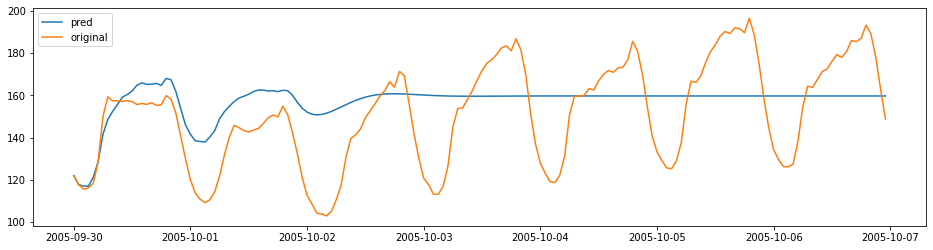

In [24]:
plt.plot(prediction2, label='pred')
plt.plot(df_area_2_test_s, label='original')
plt.legend();

In [ ]:
sarimax_pipeline_a2_full = Pipeline([
    ('boxcox', BoxCoxEndogTransformer(lmbda2=1e-6)),
    ('arima', pm.AutoARIMA(trace=True,
                           suppress_warnings=True,
                           m=24
                          )
    )
])

sarimax_pipeline_a2_full.fit(df_area_2_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=263.47 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-1999.482, Time=2.67 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-22758.538, Time=70.45 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-16218.340, Time=57.92 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-2001.481, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=-13068.256, Time=1.49 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=inf, Time=362.68 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=197.17 sec
 ARIMA(1,1,0)(0,0,1)[24] intercept   : AIC=-18102.079, Time=67.46 sec
 ARIMA(1,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=560.00 sec
 ARIMA(0,1,0)(1,0,0)[24] intercept   : AIC=inf, Time=23.17 sec
 ARIMA(2,1,0)(1,0,0)[24] intercept   : AIC=-22772.707, Time=89.02 sec
 ARIMA(2,1,0)(0,0,0)[24] intercept   : AIC=-13667.191, Time=3.61 sec


In [15]:
df_area_2_train.head()

,value
date,
2004-01-01 00:00:00,126.259
2004-01-01 01:00:00,123.313
2004-01-01 02:00:00,119.192
2004-01-01 03:00:00,117.507
2004-01-01 04:00:00,118.343


In [12]:
def build_target(series_, number_of_periods_ahead):
    """ 
    takes a series, turned it into a dataframe, and adds a new column called target
    This column is the input series, lagged number_of_periods_ahead into the future
    """
    
    # make a copy 
    series_ = series_.copy()
    series_.name = 'observed_values'
    
    # make a dataframe from the series
    df_ = pd.DataFrame(series_)
    
    # the target column will be the input series, lagged into the future
    df_['target'] = series_.shift(-number_of_periods_ahead)
    return df_


def build_some_features(df_, num_periods_lagged): 
    """
    Builds some features by calculating differences between periods  
    """
    # make a copy 
    df_ = df_.copy()
        
    # for a few values, get the lags  
    for i in range(1, num_periods_lagged+1):
        # make a new feature, with the lags in the observed values column
        df_['lagged_%s' % str(i)] = df_['observed_values'].shift(i)
        
    return df_

def separate_last_day(df_):
    
    """
    takes a dataset which has the target and features built 
    and separates it into the last day
    """
    # take the last period 
    last_period = df_.iloc[-1]
    
    # the last period is now a series, so it's name will be the timestamp
    training_data = df_.loc[df_.index < last_period.name]

    return last_period, training_data

def separate_train_and_test_set(last_period_, training_data_, target='target'): 
    
    """ 
    separates training and test set (clue was in the name, really... )
    Ok, we were lazy and left the target hardcoded as 'target'. Shame on us. 
    """
    
    # anything that isn't a target is a feature 
    features = [feature for feature in training_data_.columns if feature != target]
    
    # adding a sneaky little dropna to avoid the missing data problem above 
    X_train = training_data_.dropna()[features]
    y_train = training_data_.dropna()[target]
    
    X_last_period = last_period_[features]
    
    return X_train, y_train, X_last_period


def prepare_for_prediction(series_, number_of_periods_ahead, num_periods_lagged):
    
    """ 
    Wrapper to go from the original series to X_train, y_train, X_last_period 
    
    """
    
    # build the target 
    data_with_target = build_target(series_, 
                                    number_of_periods_ahead)
    
    # build the features 
    data_with_target_and_features = build_some_features(data_with_target, 
                                                        num_periods_lagged=num_periods_lagged)
    # separate train and test data 
    last_period, training_data = separate_last_day(data_with_target_and_features)

    # separate X_train, y_train, and X_test 
    X_train, y_train, X_last_period = separate_train_and_test_set(last_period, 
                                                           training_data, 
                                                           target='target')
    
    # return ALL OF THE THINGS! (well, actually just the ones we need)
    return X_train, y_train, X_last_period 


def predict_period_n(series_, model, number_of_periods_ahead, num_periods_lagged): 
    
        X_train, y_train, X_last_period = prepare_for_prediction(series_, 
                                                             number_of_periods_ahead, 
                                                             num_periods_lagged)
        
        model.fit(X_train, y_train)
        return model.predict(X_last_period.values.reshape(1, -1))

def predict_n_periods(series_, n_periods, model, num_periods_lagged): 
    predictions = []

    for period_ahead in range(1, n_periods+1):
        pred = predict_period_n(series_=series_, 
                                model=model, 
                                number_of_periods_ahead=period_ahead, 
                                num_periods_lagged=num_periods_lagged)
        
        predictions.append(pred[0])
        
    return predictions

In [26]:
df_area_2_train = df_area_2_train.rename(mapper = {"value": 'observed_values'}, axis = "columns")
df_area_2_test = df_area_2_test.rename(mapper = {"value": 'observed_values'}, axis = "columns")

predictions2 = predict_n_periods(series_=df_area_2_train, 
                  n_periods=len(df_area_2_test), 
                  model=LinearRegression(), 
                  num_periods_lagged=24)

In [27]:
len(predictions2)

168

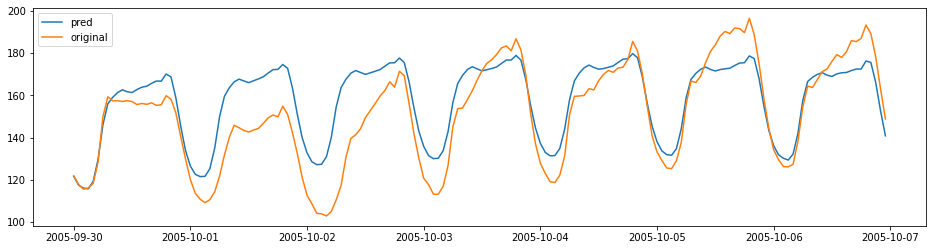

In [28]:
plt.plot(pd.Series(predictions2, index=df_area_2_test.index), label='pred')
plt.plot(df_area_2_test, label='original')
plt.legend();

In [29]:
mean_absolute_error(predictions2,df_area_2_test)

11.207697320375521